In [16]:
import pandas as pd
import numpy as np
import similarities as sim
import utils
from tqdm import tqdm

from scipy.spatial.distance import pdist, squareform

import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

In [2]:
users = list(set(pd.read_csv('data/experiment_data/ratings.csv').userId))
functions = ['binary', 'euclidean', 'cosine', 'manhattan']
k = 15

In [3]:
def error_rating(user, algorithm, k):
    # print(user)
    # Obtenemos los datos de las películas
    train_movies, test_movies = utils.get_train_test_movies(user)
    all_movies = utils.get_all_movies(user)
    
    # Calculamos la matriz filtrada de similitud
    if algorithm == 'binary':
        matrix = sim.get_binary_similarity_matrix()
    if algorithm == 'euclidean':
        matrix = sim.get_similarity_matrix(user, sim.euclidean_sim)
    elif algorithm == 'cosine':
        matrix = sim.get_similarity_matrix(user, sim.cosine_sim)
    elif algorithm == 'manhattan':
        matrix = sim.get_similarity_matrix(user, sim.manhattan_sim)
        
    filtered_matrix = utils.filter_similarity_matrix(matrix, test_movies, train_movies, all_movies)
    return utils.calculate_mean_ratings(filtered_matrix, test_movies, user, k)
    

In [4]:
errors = {}
for f in functions:
    '''
    if f == 'binary':
        matrix = sim.get_binary_similarity_matrix()
        all_movies = utils.get_all_movies(103)
        avg = []
        for u in users:
            train_movies, test_movies = utils.get_train_test_movies(u)
            filtered_matrix = utils.filter_similarity_matrix(matrix, test_movies, train_movies, all_movies)
            avg.append(utils.calculate_mean_ratings(filtered_matrix, test_movies, u, k))
            #avg.append(error_rating(u, f, k))
    else: 
    '''
    avg = []
    for u in tqdm(range(len(users))):
        #print('User:',u,'Function:',f)
        avg.append(error_rating(users[u], f, k))
    errors[f] = avg

100%|██████████| 100/100 [00:06<00:00, 14.58it/s]


In [11]:
errorsDF = pd.DataFrame.from_dict(errors, orient='index')
errorsDF

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
binary,0.516667,1.350000,1.333333,0.466667,0.509524,0.973333,1.106667,0.466667,0.952778,1.600000,...,0.666667,1.375000,0.883333,0.688889,0.554167,0.877778,1.200000,0.666667,1.050000,1.150000
euclidean,0.655556,1.416667,1.133333,0.475000,0.533333,0.906667,1.040000,0.527778,0.880556,0.800000,...,0.720000,1.583333,0.966667,0.733333,0.608333,0.788889,1.225000,0.800000,1.166667,1.233333
cosine,0.688889,1.166667,1.250000,0.483333,0.514286,0.906667,1.033333,0.544444,0.936111,0.733333,...,0.733333,1.558333,0.916667,0.644444,0.595833,0.788889,1.283333,0.800000,1.137500,1.266667
manhattan,0.672222,1.350000,1.250000,0.533333,0.547619,0.893333,1.020000,0.538889,0.919444,1.066667,...,0.706667,1.466667,1.016667,0.844444,0.620833,0.781481,1.216667,0.666667,1.083333,1.258333


In [14]:
errorsDF.iloc[0].values

array([0.51666667, 1.35      , 1.33333333, 0.46666667, 0.50952381,
       0.97333333, 1.10666667, 0.46666667, 0.95277778, 1.6       ,
       0.62666667, 0.80555556, 0.43703704, 0.75833333, 0.47222222,
       1.06666667, 1.03333333, 1.1       , 0.66296296, 0.54814815,
       0.9       , 0.49166667, 0.67407407, 1.08333333, 0.71333333,
       0.89166667, 0.51111111, 0.3875    , 0.7047619 , 0.74      ,
       1.15714286, 1.11538462, 0.81818182, 1.31666667, 0.75555556,
       0.75333333, 0.80833333, 0.48333333, 0.93888889, 0.48095238,
       1.08666667, 0.29444444, 0.58888889, 0.9047619 , 1.06666667,
       0.85666667, 0.81111111, 1.7       , 0.48888889, 0.7       ,
       0.68333333, 0.94166667, 0.73888889, 0.86666667, 0.86666667,
       0.8875    , 0.80833333, 0.66363636, 0.65333333, 0.64814815,
       0.52380952, 0.50740741, 0.69333333, 0.92962963, 0.57777778,
       0.5       , 0.95      , 0.74444444, 1.06969697, 0.86296296,
       1.2       , 0.44      , 0.        , 0.53333333, 0.72424

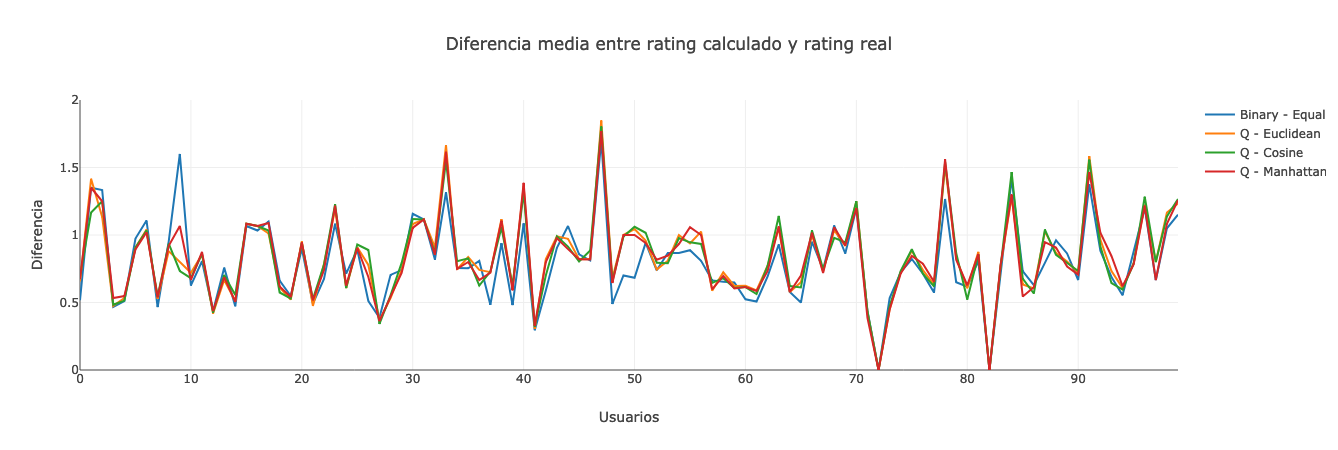

In [24]:
x_series = errorsDF.columns.values
binary = errorsDF.iloc[0].values
euclidean = errorsDF.iloc[1].values
cosine = errorsDF.iloc[2].values
manhattan = errorsDF.iloc[3].values

trace0 = go.Scatter(
    x = x_series,
    y = binary,
    name='Binary - Equal'
)

trace2 = go.Scatter(
    x = x_series,
    y = euclidean,
    name='Q - Euclidean'
)

trace3 = go.Scatter(
    x = x_series,
    y = cosine,
    name='Q - Cosine'
)

trace4 = go.Scatter(
    x = x_series,
    y = manhattan,
    name='Q - Manhattan'
)

data = [trace0, trace2, trace3, trace4]

layout = go.Layout(
    title = 'Diferencia media entre rating calculado y rating real',
    yaxis = dict(
        title='Diferencia',
        range=[0,2]
    ),
    xaxis = dict(
        title='Usuarios'
    )
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='basic-line')